# WMT figs of $G_\Omega(\theta)$ and $\frac{d}{dt}M_\Omega(\theta)$

In [1]:
import xarray as xr
import json
import gcsfs
import numpy as np
import cmocean
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import dask
import dask.array as dsa
from xgcm import Grid
import xgcm 
from xgcm.autogenerate import generate_grid_ds
from xhistogram.xarray import histogram
from matplotlib.colors import LogNorm

In [2]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

#era5_nodeltaT = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds_nodeltaT.zarr'))
#era5_ds_regridded_sst = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds_glorys_sst_regridded.zarr'))

era_ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds_updated.zarr'))
glorys = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/GOPAF/datasets/dVdt.zarr'))
merra_ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/MERRA2/datasets/hist_ds_updated.zarr'))

#open hist ds w goes sw
#era_g_ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_w_goesSW.zarr'))
#merra_g_ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/MERRA2/datasets/hist_w_goesSW.zarr'))

In [3]:
dVdt_da = glorys.histogram_theta

In [4]:
era = era_ds.sel(time=slice('2023-01-02', '2023-10-31'))
#era_g = era_g_ds.isel(time=slice(1, None))
merra = merra_ds.isel(time=slice(1, None))
#merra_g = merra_g_ds.isel(time=slice(1, None))

In [5]:
era.time

<xarray.DataArray 'time' (time: 303)> Size: 2kB
array(['2023-01-02T00:00:00.000000000', '2023-01-03T00:00:00.000000000',
       '2023-01-04T00:00:00.000000000', ..., '2023-10-29T00:00:00.000000000',
       '2023-10-30T00:00:00.000000000', '2023-10-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 2023-01-02 2023-01-03 ... 2023-10-31

In [5]:
dVdt_da.time

<xarray.DataArray 'time' (time: 303)> Size: 2kB
array(['2023-01-02T12:00:00.000000000', '2023-01-03T12:00:00.000000000',
       '2023-01-04T12:00:00.000000000', ..., '2023-10-29T12:00:00.000000000',
       '2023-10-30T12:00:00.000000000', '2023-10-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 2023-01-02T12:00:00 ... 2023-10-31T12:...
Attributes:
    _ChunkSizes:          1024
    _CoordinateAxisType:  Time
    axis:                 T
    long_name:            Time (hours since 1950-01-01)
    standard_name:        time
    valid_max:            640668.0
    valid_min:            639924.0

In [5]:
dVdt = (dVdt_da/1e6).assign_coords({'time':era.time})

In [7]:
dVdt.time

<xarray.DataArray 'time' (time: 303)> Size: 2kB
array(['2023-01-02T00:00:00.000000000', '2023-01-03T00:00:00.000000000',
       '2023-01-04T00:00:00.000000000', ..., '2023-10-29T00:00:00.000000000',
       '2023-10-30T00:00:00.000000000', '2023-10-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 2023-01-02 2023-01-03 ... 2023-10-31

In [15]:
era.time

<xarray.DataArray 'time' (time: 303)> Size: 2kB
array(['2023-01-02T00:00:00.000000000', '2023-01-03T00:00:00.000000000',
       '2023-01-04T00:00:00.000000000', ..., '2023-10-29T00:00:00.000000000',
       '2023-10-30T00:00:00.000000000', '2023-10-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 2023-01-02 2023-01-03 ... 2023-10-31

<Figure size 2000x400 with 0 Axes>

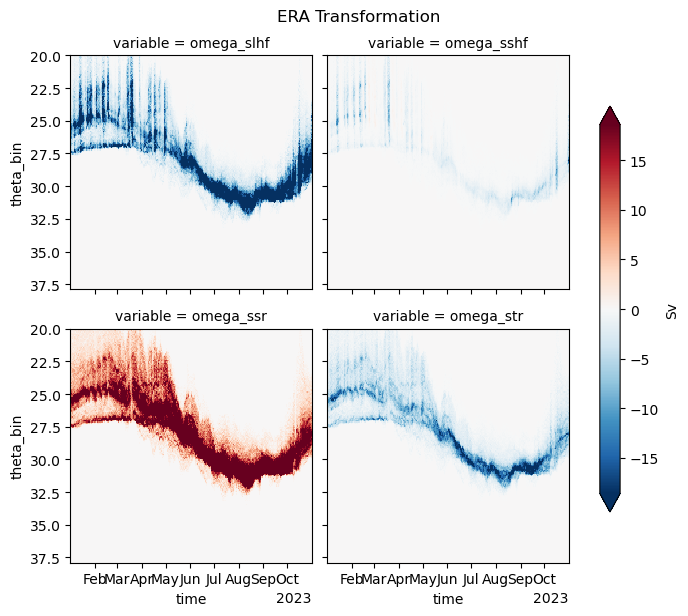

In [16]:
plt.figure(figsize=(20,4))
(era/1e6).to_array().plot(col='variable', col_wrap=2, x='time', 
                               yincrease=False, robust=True, 
                               cbar_kwargs={'shrink': 0.8, 'label':'Sv'})
plt.suptitle('ERA Transformation', y=1.02);

## Plot histograms w/ `dVdt`

In [6]:
one_plt_era = (era.sel(theta_bin=31.8, method='nearest') / 1e6)
one_plt_merra = (merra.sel(theta_bin=31.8, method='nearest') / 1e6)

#one_plt_era_g = (era_g.sel(theta_bin=31.8, method='nearest') / 1e6)
#one_plt_merra_g = (merra_g.sel(theta_bin=31.8, method='nearest') / 1e6)

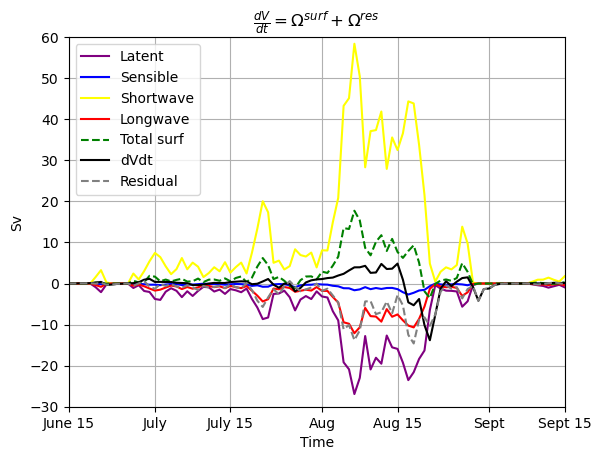

In [9]:
time_slice = dict(time=slice('2023-06-15', '2023-09-15'))
ticks = [dVdt.time[i].values for i in [164, 180, 194, 211, 225, 242, 256]]
tick_labels = ['June 15', 'July', 'July 15', 'Aug', 'Aug 15', 'Sept', 'Sept 15']
ax = plt.axes() 

one_plt_era.omega_slhf.sel(**time_slice).plot(label='Latent', color='purple')
one_plt_era.omega_sshf.sel(**time_slice).plot(label='Sensible', color='blue')
one_plt_era.omega_ssr.sel(**time_slice).plot(label='Shortwave', color='yellow')
one_plt_era.omega_str.sel(**time_slice).plot(label='Longwave', color='red')
one_plt_era.to_array().sum('variable').sel(**time_slice).plot(label='Total surf', color='green', linestyle='dashed')
dVdt.sel(**time_slice).plot(label='dVdt', color='k')
(dVdt - one_plt_era.to_array().sum('variable')).sel(**time_slice).plot(label='Residual', color='grey', linestyle='dashed')
plt.legend(loc='upper left')
plt.ylim(-30, 60)
plt.ylabel('Sv')
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
plt.xlabel('Time')
plt.grid()
t1 = dict(time='2023-06-15', method='nearest')
t2 = dict(time='2023-09-15', method='nearest')
plt.xlim(one_plt_era.time.sel(**t1), one_plt_era.time.sel(**t2))
plt.title(r'$\frac{dV}{dt} = \Omega^{surf} + \Omega^{res}$');
plt.savefig('paper-figs/era/budget.pdf')
#plt.suptitle('ERA');

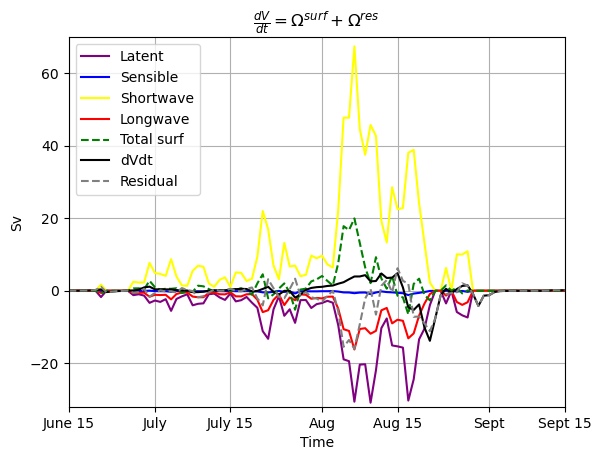

In [7]:
time_slice = dict(time=slice('2023-06-15', '2023-09-15'))
ticks = [dVdt.time[i].values for i in [164, 180, 194, 211, 225, 242, 256]]
tick_labels = ['June 15', 'July', 'July 15', 'Aug', 'Aug 15', 'Sept', 'Sept 15']
ax = plt.axes() 

one_plt_merra.omega_EFLUXWTR.sel(**time_slice).plot(label='Latent', color='purple')
one_plt_merra.omega_HFLUXWTR.sel(**time_slice).plot(label='Sensible', color='blue')
one_plt_merra.omega_SWGNTWTR.sel(**time_slice).plot(label='Shortwave', color='yellow')
one_plt_merra.omega_LWGNTWTR.sel(**time_slice).plot(label='Longwave', color='red')
one_plt_merra.to_array().sum('variable').sel(**time_slice).plot(label='Total surf', color='green', linestyle='dashed')
dVdt.sel(**time_slice).plot(label='dVdt', color='k')
(dVdt - one_plt_merra.to_array().sum('variable')).sel(**time_slice).plot(label='Residual', color='grey', linestyle='dashed')
plt.legend(loc='upper left')
plt.ylim(-32, 70)
plt.ylabel('Sv')
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
plt.xlabel('Time')
plt.grid()
t1 = dict(time='2023-06-15', method='nearest')
t2 = dict(time='2023-09-15', method='nearest')
plt.xlim(one_plt_merra.time.sel(**t1), one_plt_merra.time.sel(**t2))
plt.title(r'$\frac{dV}{dt} = \Omega^{surf} + \Omega^{res}$');
plt.savefig('paper-figs/merra/budget.pdf')
#plt.suptitle('ERA');

In [11]:
# total volume peak transformation
dVdt.sel(**time_slice).max().values

array(4.85121138)

In [12]:
# total volume peak transformation
dVdt.sel(**time_slice).argmax().values

array(61)

In [14]:
# total volume peak transformation
dVdt.sel(**time_slice)[61].time.values

numpy.datetime64('2023-08-15T00:00:00.000000000')

In [18]:
# total volume peak negative transformation
dVdt.sel(**time_slice).min().values

array(-13.80846857)

In [19]:
# total volume peak negative transformation
dVdt.sel(**time_slice).argmin().values

array(67)

In [20]:
# time of total volume peak negative transformation
dVdt.sel(**time_slice)[67].time.values

numpy.datetime64('2023-08-21T00:00:00.000000000')

In [14]:
#total surf peak transformation
one_plt_era.to_array().sum('variable').sel(**time_slice).max().values

array(17.72540832)

In [26]:
#total surf peak transformation
one_plt_era.to_array().sum('variable').sel(**time_slice).argmax().values

array(53)

In [30]:
#total surf peak transformation on Aug 8 2023
one_plt_era.to_array().sum('variable').sel(**time_slice)[53]

<xarray.DataArray ()> Size: 8B
dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    theta_bin  float64 8B 31.75
    time       datetime64[ns] 8B 2023-08-07

In [16]:
#mixing (residual) peak transformation
(dVdt - one_plt_era.to_array().sum('variable')).sel(**time_slice).min().values

array(-14.598364)

In [31]:
#mixing (residual) peak transformation
(dVdt - one_plt_era.to_array().sum('variable')).sel(**time_slice).argmax().values

array(41)

In [34]:
#mixing (residual) peak transformation on july 26, 2023
(dVdt - one_plt_era.to_array().sum('variable')).sel(**time_slice)[41]

<xarray.DataArray ()> Size: 8B
dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    time       datetime64[ns] 8B 2023-07-26
    theta_bin  float64 8B 31.75

In [38]:
print('Peak transformation from solar', one_plt_era.omega_ssr.sel(**time_slice).max().values)

Peak transformation from solar 58.3875518681311


In [41]:
one_plt_era.omega_ssr.sel(**time_slice).argmax().values

array(53)

In [45]:
print('occuring on:', one_plt_era.omega_ssr.sel(**time_slice)[53].time.values)

occuring on: 2023-08-07T00:00:00.000000000


In [19]:
print('Peak transformation from longwave', one_plt_era.omega_str.sel(**time_slice).min().values)

Peak transformation from longwave -12.10647855615118


In [49]:
print('Occuring on time index:', one_plt_era.omega_str.sel(**time_slice).argmin().values)

Occuring on time index: 53


In [22]:
print('Peak transformation from sensible', one_plt_era.omega_sshf.sel(**time_slice).min().values)

Peak transformation from sensible -2.680131899318789


In [50]:
print('Occuring on time index:', one_plt_era.omega_sshf.sel(**time_slice).argmin().values)

Occuring on time index: 63


In [51]:
one_plt_era.omega_sshf.sel(**time_slice)[63].time.values

numpy.datetime64('2023-08-17T00:00:00.000000000')

In [21]:
print('Peak transformation from latent', one_plt_era.omega_slhf.sel(**time_slice).min().values)

Peak transformation from latent -26.915919207742256


In [53]:
print('Occuring on time index:', one_plt_era.omega_slhf.sel(**time_slice).argmin().values)

Occuring on time index: 53


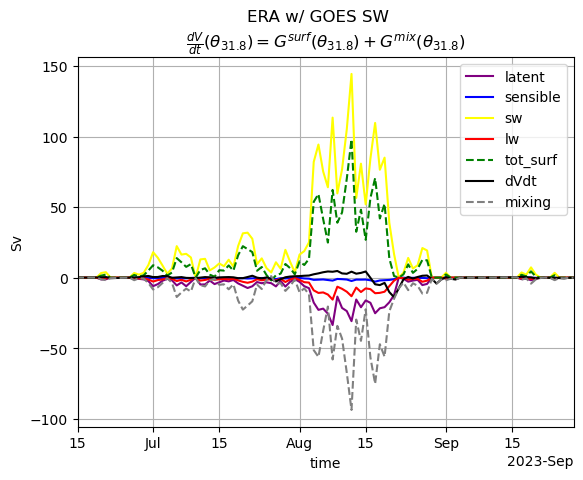

In [53]:
one_plt_era_g.omega_slhf.plot(label='latent', color='purple')
one_plt_era_g.omega_sshf.plot(label='sensible', color='blue')
one_plt_era_g.omega_ssr.plot(label='sw', color='yellow')
one_plt_era_g.omega_str.plot(label='lw', color='red')
one_plt_era_g.to_array().sum('variable').plot(label='tot_surf', color='green', linestyle='dashed')
dVdt_s.plot(label='dVdt', color='k')
(dVdt_s - one_plt_era_g.to_array().sum('variable')).plot(label='mixing', color='grey', linestyle='dashed')
plt.legend()
plt.ylabel('Sv')
plt.grid()
t1 = dict(time='2023-06-15', method='nearest')
t2 = dict(time='2023-10-01', method='nearest')
plt.xlim(one_plt_era.time.sel(**t1), one_plt_era.time.sel(**t2))
plt.title(r'$\frac{dV}{dt}(\theta_{31.8}) = G^{surf}(\theta_{31.8}) + G^{mix}(\theta_{31.8})$')
plt.suptitle('ERA w/ GOES SW');

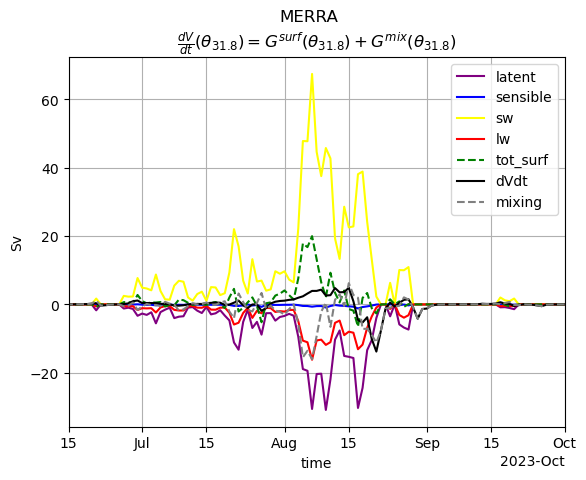

In [18]:
one_plt_merra.omega_EFLUXWTR.plot(label='latent', color='purple')
one_plt_merra.omega_HFLUXWTR.plot(label='sensible', color='blue')
one_plt_merra.omega_SWGNTWTR.plot(label='sw', color='yellow')
one_plt_merra.omega_LWGNTWTR.plot(label='lw', color='red')
one_plt_merra.to_array().sum('variable').plot(label='tot_surf', color='green', linestyle='dashed')
dVdt.plot(label='dVdt', color='k')
(dVdt - one_plt_merra.to_array().sum('variable')).plot(label='mixing', color='grey', linestyle='dashed')
plt.legend()
plt.ylabel('Sv')
plt.grid()
t1 = dict(time='2023-06-15', method='nearest')
t2 = dict(time='2023-10-01', method='nearest')
plt.xlim(one_plt_merra.time.sel(**t1), one_plt_merra.time.sel(**t2))
plt.title(r'$\frac{dV}{dt}(\theta_{31.8}) = G^{surf}(\theta_{31.8}) + G^{mix}(\theta_{31.8})$')
plt.suptitle('MERRA');

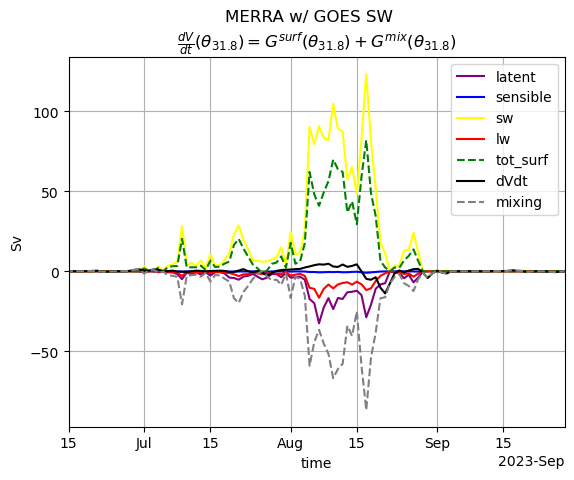

In [51]:
one_plt_merra_g.omega_EFLUXWTR.plot(label='latent', color='purple')
one_plt_merra_g.omega_HFLUXWTR.plot(label='sensible', color='blue')
one_plt_merra_g.omega_SWGNTWTR.plot(label='sw', color='yellow')
one_plt_merra_g.omega_LWGNTWTR.plot(label='lw', color='red')
one_plt_merra_g.to_array().sum('variable').plot(label='tot_surf', color='green', linestyle='dashed')
dVdt_s.plot(label='dVdt', color='k')
(dVdt_s - one_plt_merra_g.to_array().sum('variable')).plot(label='mixing', color='grey', linestyle='dashed')
plt.legend()
plt.ylabel('Sv')
plt.grid()
t1 = dict(time='2023-06-15', method='nearest')
t2 = dict(time='2023-10-01', method='nearest')
plt.xlim(one_plt_merra_g.time.sel(**t1), one_plt_merra_g.time.sel(**t2))
plt.title(r'$\frac{dV}{dt}(\theta_{31.8}) = G^{surf}(\theta_{31.8}) + G^{mix}(\theta_{31.8})$')
plt.suptitle('MERRA w/ GOES SW');